<a href="https://colab.research.google.com/github/Navaneethp0/Car-price-prediction/blob/main/Car_price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(color_codes=True)
import sklearn

In [ ]:
data=pd.read_csv("/content/drive/MyDrive/CarPrice_Assignment.csv")

In [ ]:
data

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [ ]:
data.head(5)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [ ]:
data.shape

(205, 26)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [ ]:
data.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

# **Label Encoding**

In [ ]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
data['CarName']=lb.fit_transform(data['CarName'])
data['fueltype']=lb.fit_transform(data['fueltype'])
data['aspiration']=lb.fit_transform(data['aspiration'])
data['doornumber']=lb.fit_transform(data['doornumber'])
data['carbody']=lb.fit_transform(data['carbody'])
data['drivewheel']=lb.fit_transform(data['drivewheel'])
data['enginelocation']=lb.fit_transform(data['enginelocation'])
data['enginetype']=lb.fit_transform(data['enginetype'])
data['cylindernumber']=lb.fit_transform(data['cylindernumber'])
data['fuelsystem']=lb.fit_transform(data['fuelsystem'])

In [ ]:
data

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,2,1,0,1,0,2,0,88.6,...,130,5,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,3,1,0,1,0,2,0,88.6,...,130,5,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,1,1,0,1,2,2,0,94.5,...,152,5,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,4,1,0,0,3,1,0,99.8,...,109,5,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,5,1,0,0,3,0,0,99.4,...,136,5,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,139,1,0,0,3,2,0,109.1,...,141,5,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,138,1,1,0,3,2,0,109.1,...,141,5,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,140,1,0,0,3,2,0,109.1,...,173,5,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,142,0,1,0,3,2,0,109.1,...,145,3,3.01,3.40,23.0,106,4800,26,27,22470.0


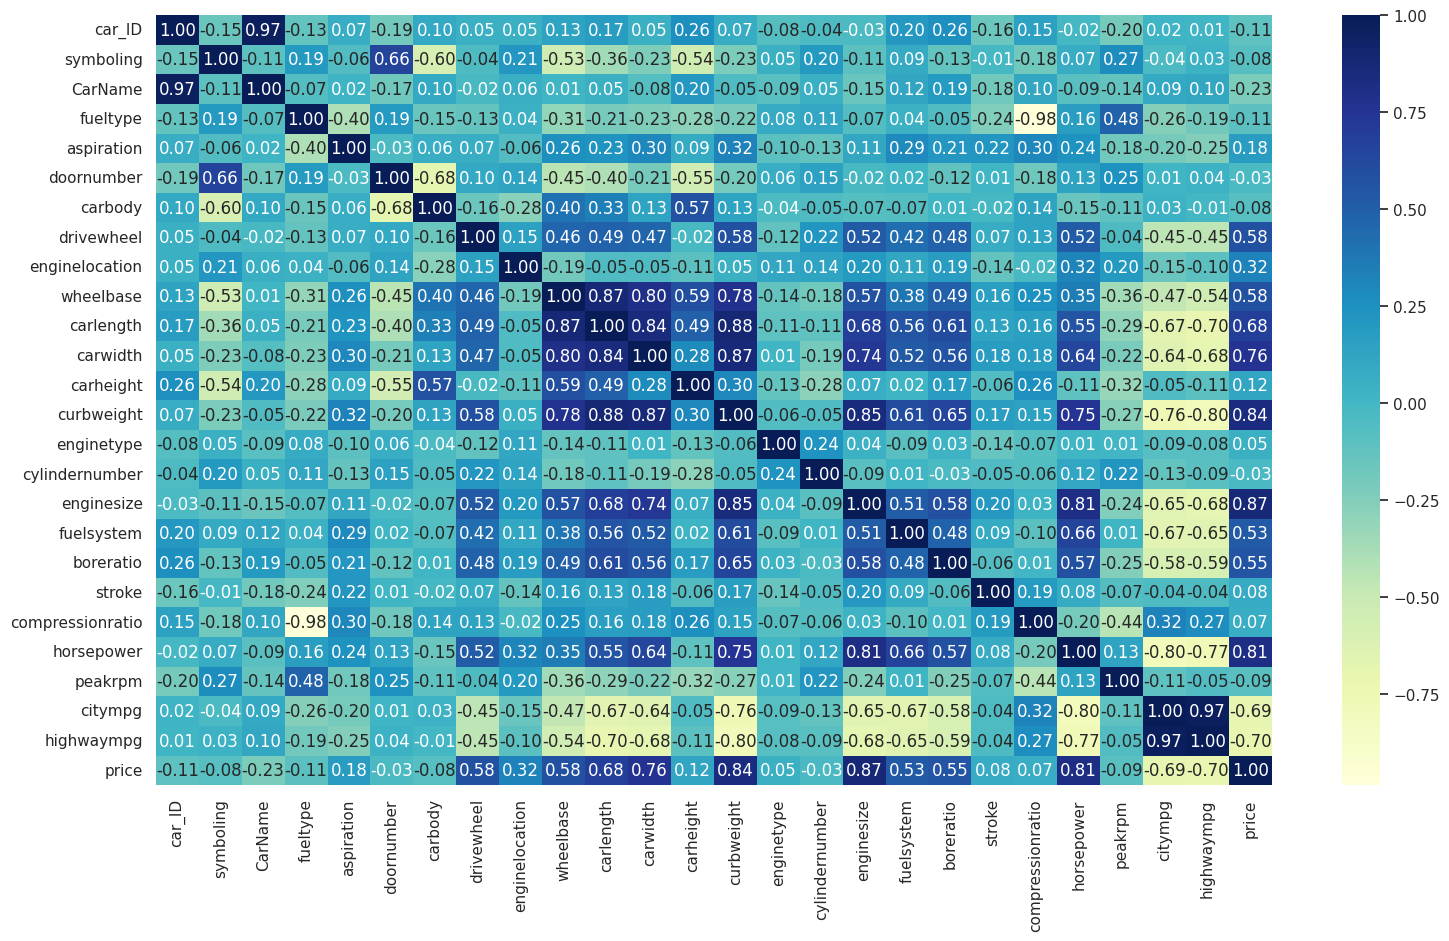

In [ ]:
plt.subplots(figsize=(18,10))
sns.heatmap(data.corr(), cmap = "YlGnBu", annot=True, fmt=".2f")
plt.show()


In [ ]:
# Drop unecessary columns

data.drop(['car_ID', 'doornumber','peakrpm','aspiration','carbody','boreratio','stroke','enginelocation','cylindernumber'], axis = 1, inplace = True)


# **Missing Data**

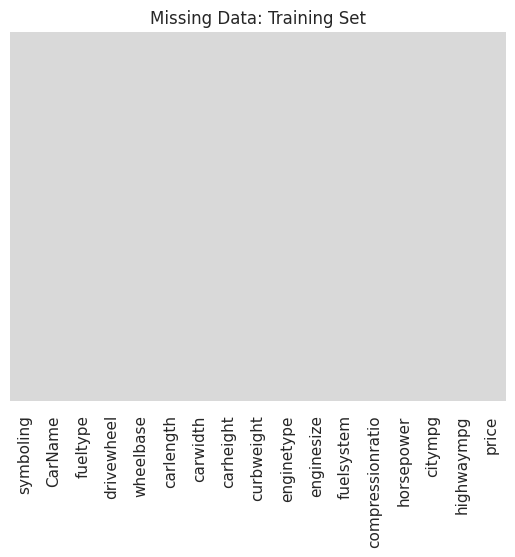

In [ ]:
# Heatmap
sns.heatmap(data.isnull(),yticklabels = False, cbar = False,cmap = 'tab20c_r')
plt.title('Missing Data: Training Set')
plt.show()

In [ ]:
data.head()

,symboling,CarName,fueltype,drivewheel,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,enginesize,fuelsystem,compressionratio,horsepower,citympg,highwaympg,price
0,3,2,1,2,88.6,168.8,64.1,48.8,2548,0,130,5,9.0,111,21,27,13495.0
1,3,3,1,2,88.6,168.8,64.1,48.8,2548,0,130,5,9.0,111,21,27,16500.0
2,1,1,1,2,94.5,171.2,65.5,52.4,2823,5,152,5,9.0,154,19,26,16500.0
3,2,4,1,1,99.8,176.6,66.2,54.3,2337,3,109,5,10.0,102,24,30,13950.0
4,2,5,1,0,99.4,176.6,66.4,54.3,2824,3,136,5,8.0,115,18,22,17450.0


In [ ]:
numerical_columns = ['wheelbase','carlength','carwidth','carheight','curbweight','enginesize','horsepower','highwaympg','price']

def remove_outliers(data, cols):
    Q1 = data[cols].quantile(0.25)
    Q3 = data[cols].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR
    return data[~((data[cols] < lower_bound) | (data[cols] > upper_bound)).any(axis=1)]

data = remove_outliers(data, numerical_columns)
df_copy = data

In [ ]:
x = data.drop('price', axis = 1)


y = data['price']

# **Linear Regression**

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x, y,test_size=0.3,random_state=0)

In [ ]:
from sklearn import preprocessing
pre_process = preprocessing. MinMaxScaler().fit(x)
x_transform = pre_process.fit_transform(x)


In [ ]:

from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler


lin_reg = LinearRegression()


lin_reg.fit(x_train, y_train)

LinearRegression()

In [ ]:
# Predict
y_pred = lin_reg.predict(x_test)
print(y_pred.shape)
print(y_pred)

(55,)
[18256.13259732  7674.38460629 11861.67651384 18314.85496606
 15891.88393369 12544.8120299  12757.00630535  5044.57669819
  7141.15447256  6017.88472392 13544.53222551 13242.49205837
 16443.99662079  5701.46069948  8958.78907134 14399.4194163
  6459.50968812 13867.79928891  6038.0760291   9914.80648377
 10456.27731564 15050.25017287  5961.5388195  12144.31009618
 13835.45600026 13150.61300497 18065.64732633 16716.11188284
 13726.37920567 17074.51697783 13053.620415    8695.75025342
  8118.72229564  5432.44272918 10923.15982524 18087.05977828
 13034.82484277 13745.95332859 18340.95524646  5745.3377363
  9104.83036503 15138.7862342   6686.81886049 10139.44624971
 17343.29874047 23994.95414133  8800.528315   13322.75803341
  7693.9587292   6720.47747471  6398.82535185 10116.91755394
  9090.42257294 10450.01172576 10053.28188571]


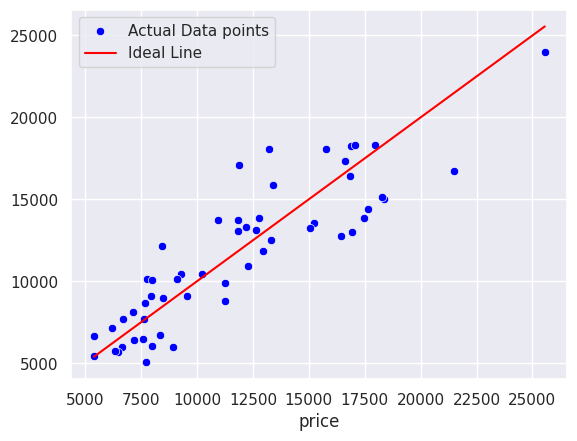

In [ ]:
sns.scatterplot(x=y_test, y=y_pred, color='blue', label='Actual Data points')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', label='Ideal Line')
plt.legend()
plt.show()